In [1]:
'''
Prepare rules for the all the data sets 
1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values
2) Change the minimum length in apriori algorithm
3) Visulize the obtained rules using different plots 
'''

'\nPrepare rules for the all the data sets \n1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values\n2) Change the minimum length in apriori algorithm\n3) Visulize the obtained rules using different plots \n'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules


In [3]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 84A1-6D3A

 Directory of C:\Users\hp\Documents\EXCELR\DS_Assign_Ans

08/01/2023  03:16 PM    <DIR>          .
07/28/2023  12:05 PM    <DIR>          ..
08/01/2023  02:44 PM    <DIR>          .ipynb_checkpoints
07/26/2023  05:55 PM           783,051 50_startups data-MLR.ipynb
07/26/2023  12:10 PM             2,438 50_Startups.csv
07/28/2023  07:07 PM            81,413 Airlines_DBSCAN.ipynb
07/28/2023  07:12 PM           159,209 Airlines_Hierarchical_clustering.ipynb
07/28/2023  07:09 PM           145,996 Airlines_Kmeans.ipynb
08/01/2023  02:41 PM           164,575 apriori algorithm_Book.ipynb
08/01/2023  03:16 PM           152,101 apriori algorithm-my_movies.ipynb
07/26/2023  06:03 PM         4,610,348 bank-full.csv
04/26/2023  08:47 AM    <DIR>          Basic_Stats_L1
04/26/2023  08:57 AM    <DIR>          Basic_Stats_L2
07/29/2023  12:59 PM            46,094 book.csv
04/15/2023  10:24 PM    <DIR>          Clustering
07/26/2023 

In [4]:
data=pd.read_csv("my_movies.csv")
data.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   V1             10 non-null     object
 1   V2             10 non-null     object
 2   V3             7 non-null      object
 3   V4             2 non-null      object
 4   V5             1 non-null      object
 5   Sixth Sense    10 non-null     int64 
 6   Gladiator      10 non-null     int64 
 7   LOTR1          10 non-null     int64 
 8   Harry Potter1  10 non-null     int64 
 9   Patriot        10 non-null     int64 
 10  LOTR2          10 non-null     int64 
 11  Harry Potter2  10 non-null     int64 
 12  LOTR           10 non-null     int64 
 13  Braveheart     10 non-null     int64 
 14  Green Mile     10 non-null     int64 
dtypes: int64(10), object(5)
memory usage: 1.3+ KB


In [6]:
data1=pd.get_dummies(data)
data1.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile,...,V2_LOTR,V2_LOTR1,V2_LOTR2,V2_Patriot,V3_Braveheart,V3_Gladiator,V3_Harry Potter1,V3_Sixth Sense,V4_Green Mile,V5_LOTR2
0,1,0,1,1,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,1,1
1,0,1,0,0,1,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [7]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Sixth Sense       10 non-null     int64
 1   Gladiator         10 non-null     int64
 2   LOTR1             10 non-null     int64
 3   Harry Potter1     10 non-null     int64
 4   Patriot           10 non-null     int64
 5   LOTR2             10 non-null     int64
 6   Harry Potter2     10 non-null     int64
 7   LOTR              10 non-null     int64
 8   Braveheart        10 non-null     int64
 9   Green Mile        10 non-null     int64
 10  V1_Gladiator      10 non-null     uint8
 11  V1_Harry Potter1  10 non-null     uint8
 12  V1_LOTR1          10 non-null     uint8
 13  V1_Sixth Sense    10 non-null     uint8
 14  V2_Harry Potter2  10 non-null     uint8
 15  V2_LOTR           10 non-null     uint8
 16  V2_LOTR1          10 non-null     uint8
 17  V2_LOTR2          10 non-null     uint

In [8]:
data1.shape

(10, 25)

In [9]:
data1.isnull().sum()

Sixth Sense         0
Gladiator           0
LOTR1               0
Harry Potter1       0
Patriot             0
LOTR2               0
Harry Potter2       0
LOTR                0
Braveheart          0
Green Mile          0
V1_Gladiator        0
V1_Harry Potter1    0
V1_LOTR1            0
V1_Sixth Sense      0
V2_Harry Potter2    0
V2_LOTR             0
V2_LOTR1            0
V2_LOTR2            0
V2_Patriot          0
V3_Braveheart       0
V3_Gladiator        0
V3_Harry Potter1    0
V3_Sixth Sense      0
V4_Green Mile       0
V5_LOTR2            0
dtype: int64

## Apriori Algorithm

### Associations Rule with 10% support and 80% confidence

In [10]:
frequent_itemsets = apriori(data1, min_support=0.1, use_colnames=True)
frequent_itemsets

C:\Users\hp\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
...,...,...
1392,0.1,"(V3_Harry Potter1, Green Mile, V1_Sixth Sense,..."
1393,0.1,"(V3_Harry Potter1, Green Mile, V1_Sixth Sense,..."
1394,0.1,"(V3_Harry Potter1, Green Mile, V1_Sixth Sense,..."
1395,0.1,"(V3_Harry Potter1, Green Mile, V1_Sixth Sense,..."


In [11]:
#Association Rule Mining

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.8)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80,0.400000
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40,0.533333
2,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96,-0.333333
3,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80,-0.200000
4,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80,-0.200000
...,...,...,...,...,...,...,...,...,...,...
64219,(V4_Green Mile),"(V3_Harry Potter1, Green Mile, V1_Sixth Sense,...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000
64220,(Sixth Sense),"(V3_Harry Potter1, Green Mile, V1_Sixth Sense,...",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08,1.000000
64221,(Harry Potter1),"(V3_Harry Potter1, Green Mile, V1_Sixth Sense,...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000
64222,(LOTR2),"(V3_Harry Potter1, Green Mile, V1_Sixth Sense,...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000


In [12]:
#An leverage value of 0 indicates independence. Range will be [-1 1]
#A high conviction value means that the consequent is highly depending on the antecedent and range [0 inf]

In [13]:
rules.sort_values('lift',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
32112,"(V5_LOTR2, LOTR2, Sixth Sense, Harry Potter1)","(V3_Harry Potter1, Green Mile, LOTR1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000
52642,"(V5_LOTR2, V4_Green Mile, V2_LOTR1, V1_Sixth S...","(LOTR2, Sixth Sense, Green Mile, LOTR1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000
33414,"(Sixth Sense, V2_LOTR1)","(LOTR1, V4_Green Mile, V5_LOTR2, LOTR2, Harry ...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000
33415,"(Harry Potter1, V2_LOTR1)","(V4_Green Mile, Sixth Sense, V5_LOTR2, LOTR2, ...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000
33416,"(LOTR2, V2_LOTR1)","(LOTR1, V4_Green Mile, Sixth Sense, V5_LOTR2, ...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000
...,...,...,...,...,...,...,...,...,...,...
8,(Sixth Sense),(LOTR2),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96,-0.333333
5,(Sixth Sense),(Harry Potter1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96,-0.333333
4,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80,-0.200000
3,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80,-0.200000


In [14]:
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80,0.400000
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40,0.533333
6,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20,0.250000
7,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20,0.250000
10,(Sixth Sense),(LOTR),0.6,0.1,0.1,0.166667,1.666667,0.04,1.08,1.000000
...,...,...,...,...,...,...,...,...,...,...
64219,(V4_Green Mile),"(V3_Harry Potter1, Green Mile, V1_Sixth Sense,...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000
64220,(Sixth Sense),"(V3_Harry Potter1, Green Mile, V1_Sixth Sense,...",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08,1.000000
64221,(Harry Potter1),"(V3_Harry Potter1, Green Mile, V1_Sixth Sense,...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000
64222,(LOTR2),"(V3_Harry Potter1, Green Mile, V1_Sixth Sense,...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000


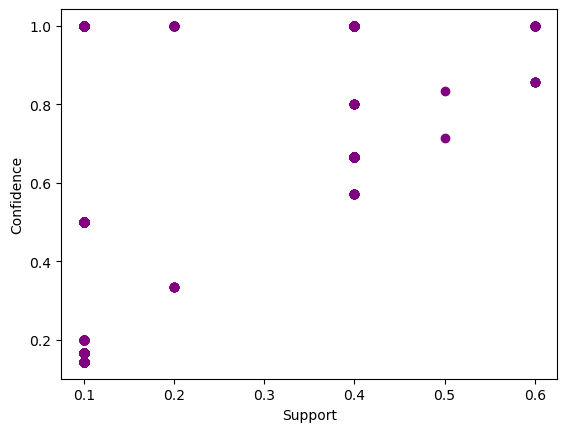

In [15]:
plt.scatter(rules['support'],rules['confidence'],c="Purple")
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

### Associations Rule with 30% support and 70% confidence

In [16]:
frequent_itemsets1 = apriori(data1, min_support=0.3, use_colnames=True)
frequent_itemsets1

C:\Users\hp\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.6,(Patriot)
3,0.6,(V1_Gladiator)
4,0.6,(V2_Patriot)
...,...,...
58,0.4,"(Gladiator, V2_Patriot, V3_Sixth Sense, Patrio..."
59,0.4,"(V1_Gladiator, Gladiator, V2_Patriot, V3_Sixth..."
60,0.4,"(V1_Gladiator, V2_Patriot, V3_Sixth Sense, Pat..."
61,0.4,"(V1_Gladiator, Gladiator, V2_Patriot, V3_Sixth..."


In [17]:
rules1 = association_rules(frequent_itemsets1, metric="lift", min_threshold=0.7)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
4,(V1_Gladiator),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
...,...,...,...,...,...,...,...,...,...,...
597,(Gladiator),"(V1_Gladiator, V2_Patriot, V3_Sixth Sense, Pat...",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4,1.000000
598,(V2_Patriot),"(V1_Gladiator, Gladiator, V3_Sixth Sense, Patr...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8,1.000000
599,(V3_Sixth Sense),"(V1_Gladiator, Gladiator, V2_Patriot, Patriot,...",0.4,0.4,0.4,1.000000,2.500000,0.24,inf,1.000000
600,(Patriot),"(V1_Gladiator, Gladiator, V2_Patriot, V3_Sixth...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8,1.000000


In [18]:
rules1[rules1.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
4,(V1_Gladiator),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
...,...,...,...,...,...,...,...,...,...,...
597,(Gladiator),"(V1_Gladiator, V2_Patriot, V3_Sixth Sense, Pat...",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4,1.000000
598,(V2_Patriot),"(V1_Gladiator, Gladiator, V3_Sixth Sense, Patr...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8,1.000000
599,(V3_Sixth Sense),"(V1_Gladiator, Gladiator, V2_Patriot, Patriot,...",0.4,0.4,0.4,1.000000,2.500000,0.24,inf,1.000000
600,(Patriot),"(V1_Gladiator, Gladiator, V2_Patriot, V3_Sixth...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8,1.000000


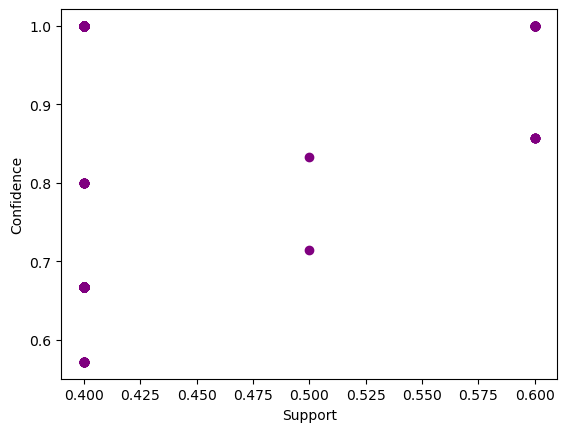

In [19]:
plt.scatter(rules1['support'],rules1['confidence'],c="Purple")
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

### Associations Rule with 20% support and 60% confidence

In [20]:
frequent_itemsets2 = apriori(data1, min_support=0.2, use_colnames=True)
frequent_itemsets2

C:\Users\hp\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
...,...,...
76,0.4,"(Gladiator, V2_Patriot, V3_Sixth Sense, Patrio..."
77,0.4,"(V1_Gladiator, Gladiator, V2_Patriot, V3_Sixth..."
78,0.4,"(V1_Gladiator, V2_Patriot, V3_Sixth Sense, Pat..."
79,0.4,"(V1_Gladiator, Gladiator, V2_Patriot, V3_Sixth..."


In [21]:
rules2 = association_rules(frequent_itemsets2, metric="lift", min_threshold=0.6)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
4,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2,1.000000
...,...,...,...,...,...,...,...,...,...,...
649,(Gladiator),"(V1_Gladiator, V2_Patriot, V3_Sixth Sense, Pat...",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4,1.000000
650,(V2_Patriot),"(V1_Gladiator, Gladiator, V3_Sixth Sense, Patr...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8,1.000000
651,(V3_Sixth Sense),"(V1_Gladiator, Gladiator, V2_Patriot, Patriot,...",0.4,0.4,0.4,1.000000,2.500000,0.24,inf,1.000000
652,(Patriot),"(V1_Gladiator, Gladiator, V2_Patriot, V3_Sixth...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8,1.000000


In [22]:
rules2[rules2.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
4,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2,1.000000
...,...,...,...,...,...,...,...,...,...,...
649,(Gladiator),"(V1_Gladiator, V2_Patriot, V3_Sixth Sense, Pat...",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4,1.000000
650,(V2_Patriot),"(V1_Gladiator, Gladiator, V3_Sixth Sense, Patr...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8,1.000000
651,(V3_Sixth Sense),"(V1_Gladiator, Gladiator, V2_Patriot, Patriot,...",0.4,0.4,0.4,1.000000,2.500000,0.24,inf,1.000000
652,(Patriot),"(V1_Gladiator, Gladiator, V2_Patriot, V3_Sixth...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8,1.000000


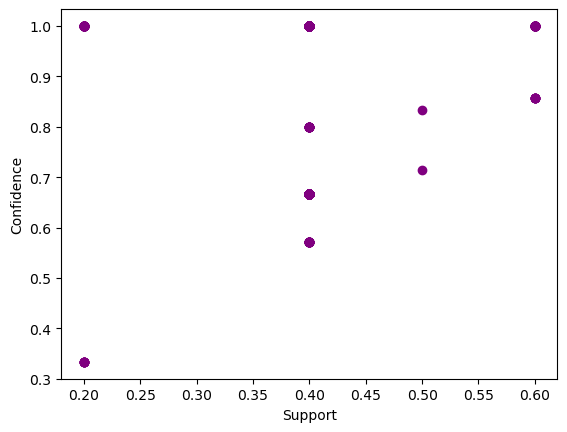

In [23]:
plt.scatter(rules2['support'],rules2['confidence'],c="Purple")
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

### Associations Rule with 5% support and 70% confidence

In [24]:
frequent_itemsets3 = apriori(data1, min_support=0.05, use_colnames=True)
frequent_itemsets3

C:\Users\hp\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
...,...,...
1392,0.1,"(V3_Harry Potter1, Green Mile, V1_Sixth Sense,..."
1393,0.1,"(V3_Harry Potter1, Green Mile, V1_Sixth Sense,..."
1394,0.1,"(V3_Harry Potter1, Green Mile, V1_Sixth Sense,..."
1395,0.1,"(V3_Harry Potter1, Green Mile, V1_Sixth Sense,..."


In [25]:
rules3 = association_rules(frequent_itemsets3, metric="lift", min_threshold=0.7)
rules3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80,0.400000
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40,0.533333
2,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96,-0.333333
3,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80,-0.200000
4,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80,-0.200000
...,...,...,...,...,...,...,...,...,...,...
64247,(V4_Green Mile),"(V3_Harry Potter1, Green Mile, V1_Sixth Sense,...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000
64248,(Sixth Sense),"(V3_Harry Potter1, Green Mile, V1_Sixth Sense,...",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08,1.000000
64249,(Harry Potter1),"(V3_Harry Potter1, Green Mile, V1_Sixth Sense,...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000
64250,(LOTR2),"(V3_Harry Potter1, Green Mile, V1_Sixth Sense,...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000


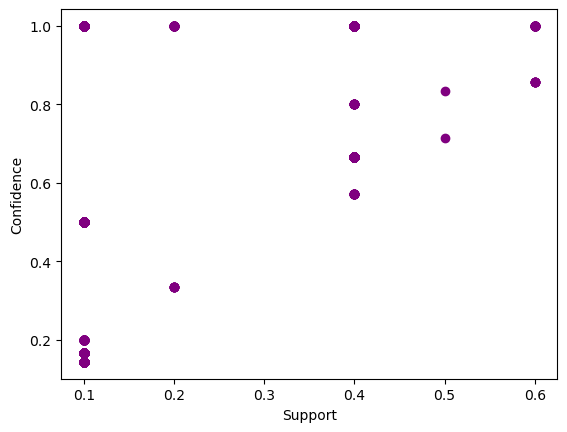

In [26]:
plt.scatter(rules3['support'],rules3['confidence'],c="Purple")
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()